# A2: Bias in data

In [1]:
# set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Data Preparation

First, let's get the data ready.

In [2]:
attack_comments = pd.read_csv('data/Wikipedia_Talk_Labels_Personal_Attacks/attack_annotated_comments.tsv', sep = '\t')
attack_annotations = pd.read_csv('data/Wikipedia_Talk_Labels_Personal_Attacks/attack_annotations.tsv',  sep = '\t')
attack_demograohics = pd.read_csv('data/Wikipedia_Talk_Labels_Personal_Attacks/attack_worker_demographics.tsv',  sep = '\t')
attack_demograohics = attack_demograohics.set_index("worker_id")

toxic_comments = pd.read_csv('data/Wikipedia_Talk_Labels_Toxicity/toxicity_annotated_comments.tsv', sep = '\t')
toxic_annotations = pd.read_csv('data/Wikipedia_Talk_Labels_Toxicity/toxicity_annotations.tsv',  sep = '\t')
toxic_demograohics = pd.read_csv('data/Wikipedia_Talk_Labels_Toxicity/toxicity_worker_demographics.tsv',  sep = '\t')
toxic_demograohics = toxic_demograohics.set_index("worker_id")

Join the three datasets for attack data.

In [3]:
attack = attack_comments.merge(attack_annotations, left_on = 'rev_id', right_on='rev_id')
attack = attack.merge(attack_demograohics, left_on = 'worker_id', right_on='worker_id')

For toxicity data, change the data type of rev_id to int first, before merging the datasets.

In [4]:
toxic_comments["rev_id"]= toxic_comments["rev_id"].astype(int)
toxic_annotations["rev_id"]= toxic_annotations["rev_id"].astype(int)

toxic = toxic_comments.merge(toxic_annotations, left_on = 'rev_id', right_on='rev_id')
toxic = toxic.merge(toxic_demograohics, left_on = 'worker_id', right_on='worker_id')

Now briefly inspect each table to check if we merge these datasets correctly

In [5]:
attack.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,gender,english_first_language,age_group,education
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
1,3202092,NEWLINE_TOKENNEWLINE_TOKENHi. I haven't used o...,2004,True,user,random,train,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
2,4745553,NEWLINE_TOKENJust look it up. Its obvious.,2004,False,user,random,train,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
3,4855563,NEWLINE_TOKENNEWLINE_TOKENI'm going to gather ...,2004,True,article,random,test,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
4,8350378,`NEWLINE_TOKENNEWLINE_TOKEN§ I got in touch wi...,2004,True,article,random,train,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters


In [6]:
toxic.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors
1,37346,`If they are ``indisputable`` then why does th...,2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors
2,227181,"NEWLINE_TOKENNEWLINE_TOKENWell, Ayn Rand certa...",2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors
3,2810755,NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE...,2004,True,user,random,train,723,0,0.0,female,0,30-45,bachelors
4,7270696,NEWLINE_TOKENNEWLINE_TOKEN==Useful info==NEWLI...,2004,True,article,random,train,723,0,0.0,female,0,30-45,bachelors


## Step 2: Analysis

First, let's analyze the basic demographic information about the Crowdflower workers in both personal attack and toxicity datasets. 

### Personal Attact
- **Gender:** 

male      0.615982
female    0.383562
other     0.000457
Name: gender, dtype: float64

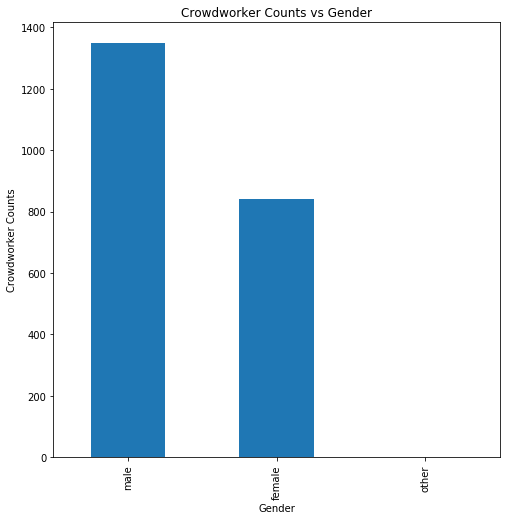

In [7]:
attack_gender = attack_demograohics['gender'].value_counts()
plt.figure(figsize=(8,8))
attack_gender.plot(kind='bar')
display(attack_gender/attack_gender.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Gender')
plt.title('Crowdworker Counts vs Gender')
plt.savefig('plot/attack_gender')
plt.show()

-  **Age:**

18-30       0.486775
30-45       0.385615
45-60       0.101160
Under 18    0.017169
Over 60     0.009281
Name: age_group, dtype: float64

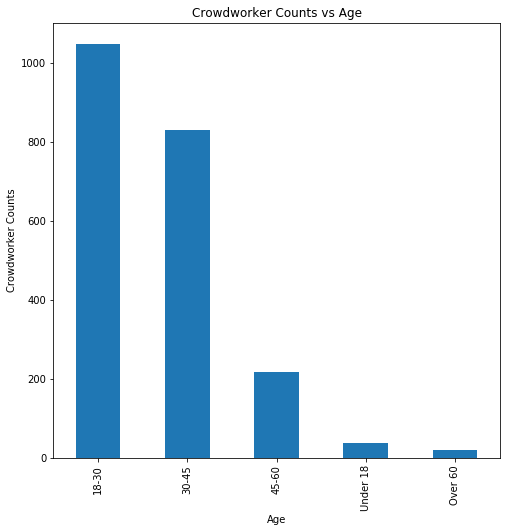

In [8]:
attack_age = attack_demograohics['age_group'].value_counts()
plt.figure(figsize=(8,8))
attack_age.plot(kind='bar')
display(attack_age/attack_age.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Age')
plt.title('Crowdworker Counts vs Age')
plt.savefig('plot/attack_age')
plt.show()


- **Education**

notes: 

none : none schooling

some : some schooling

hs: high school

bachelors       0.393607
hs              0.288128
masters         0.175799
professional    0.110959
some            0.021918
doctorate       0.009132
none            0.000457
Name: education, dtype: float64

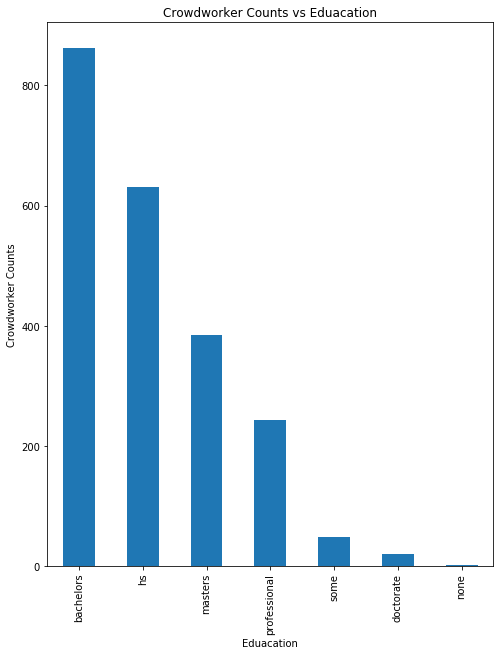

In [9]:
attack_ed = attack_demograohics['education'].value_counts()
plt.figure(figsize=(8,10))
attack_ed.plot(kind='bar')
display(attack_ed/attack_ed.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Eduacation')
plt.title('Crowdworker Counts vs Eduacation')
plt.savefig('plot/attack_education')
plt.show()

- **First Language** 

notes: 

0 : first language is English

1 : first language is not English

0    0.816438
1    0.183562
Name: english_first_language, dtype: float64

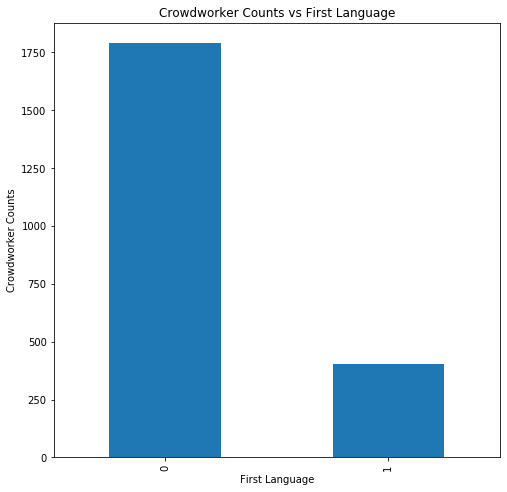

In [10]:
attack_eng = attack_demograohics['english_first_language'].value_counts()
plt.figure(figsize=(8,8))
attack_eng.plot(kind='bar')
display(attack_eng/attack_eng.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('First Language')
plt.title('Crowdworker Counts vs First Language')
plt.savefig('plot/attack_language')
plt.show()

### Toxicity
- **Gender:** 

male      0.648009
female    0.351713
other     0.000278
Name: gender, dtype: float64

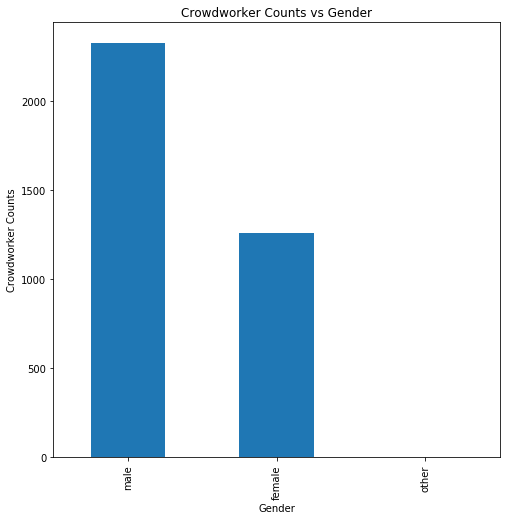

In [11]:
toxic_gender = toxic_demograohics['gender'].value_counts()
plt.figure(figsize=(8,8))
toxic_gender.plot(kind='bar')
display(toxic_gender/toxic_gender.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Gender')
plt.title('Crowdworker Counts vs Gender')
plt.savefig('plot/toxic_gender')
plt.show()

-  **Age:**

18-30       0.529880
30-45       0.354866
45-60       0.084234
Under 18    0.022482
Over 60     0.008537
Name: age_group, dtype: float64

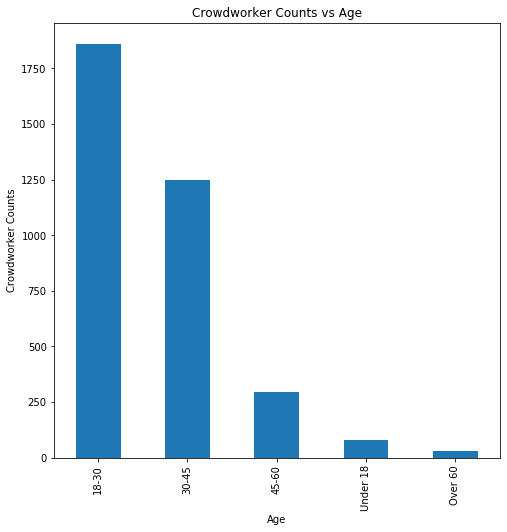

In [12]:
toxic_age = toxic_demograohics['age_group'].value_counts()
plt.figure(figsize=(8,8))
toxic_age.plot(kind='bar')
display(toxic_age/toxic_age.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Age')
plt.title('Crowdworker Counts vs Age')
plt.savefig('plot/toxic_age')
plt.show()

- **Education**

notes: 

none : none schooling

some : some schooling

hs: high school

bachelors       0.401281
hs              0.285714
masters         0.152047
professional    0.122807
some            0.025898
doctorate       0.011417
none            0.000835
Name: education, dtype: float64

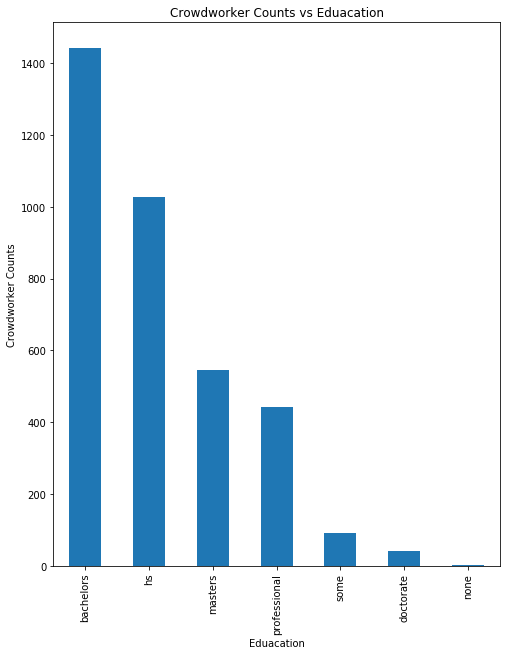

In [13]:
toxic_ed = toxic_demograohics['education'].value_counts()
plt.figure(figsize=(8,10))
toxic_ed.plot(kind='bar')
display(toxic_ed/toxic_ed.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Eduacation')
plt.title('Crowdworker Counts vs Eduacation')
plt.savefig('plot/toxic_education')
plt.show()

- **First Language** 

notes: 0 means first language is English, 1 means first language is not English

0    0.814536
1    0.185464
Name: english_first_language, dtype: float64

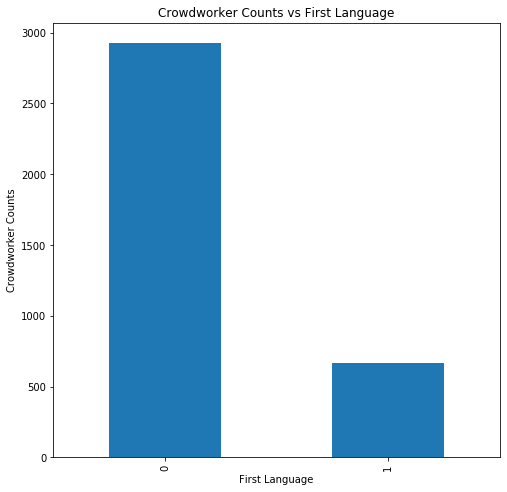

In [14]:
toxic_eng = toxic_demograohics['english_first_language'].value_counts()
plt.figure(figsize=(8,8))
toxic_eng.plot(kind='bar')
display(toxic_eng/toxic_eng.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('First Language')
plt.title('Crowdworker Counts vs First Language')
plt.savefig('plot/toxic_language')
plt.show()

As can be seen from the above graphs, the majority of annotators of both datasets are male, age between 18 to 45, high school or bachelor level of education, and English Native speaker.

There are way more male labelers than female labelers, and there is only one annotation workers identify their gender identity as 'other'. Clearly, they can not fully represent the general population.

Roughly 40% of the workers have a bachelor's degree and most of the annotators have finished at least high school education.

For both datasets, about 50% of the workers are in the 18-30 age group, and roughly 85-90% of the people are in the 18-45 age group.

More than 80% of the workers report English as their first language. We can see a huge gap between the number of English native speakers and non-English native speakers in the annotation workers. 

Annotators from both datasets are not inclusive enough, which may lead to more bias in the results we get and it may not fully represent the general population.

Clearly, both sets of annotation workers are not gender-balanced, let's see more about the gender distribution in different groups.

In [15]:
# a function helps to plot multiple bar charts based on v1 and 'gender' variable of dataframe df
def multibar_plot(df, v1):
    new_data = df[[v1, 'gender']]
    new_data['count'] = 1
    new_table = new_data.pivot_table(index=[v1], columns=['gender'], values='count', aggfunc=np.sum)
    new_table = new_table.fillna(0)
    new_table.plot(kind='bar')
    new_table['sum']=new_table['female']+new_table['male']+new_table['other']
    new_table['female'] /= new_table['sum']
    new_table['male'] /= new_table['sum']
    new_table['other'] /= new_table['sum']
    display(new_table[['female', 'male', 'other']])

### Personal Attack
-  **Age:**

gender,female,male,other
age_group,,,
18-30,0.376549,0.622498,0.000953
30-45,0.361011,0.638989,0.000000
45-60,0.522936,0.477064,0.000000
Over 60,0.550000,0.450000,0.000000
Under 18,0.243243,0.756757,0.000000


<Figure size 576x576 with 0 Axes>

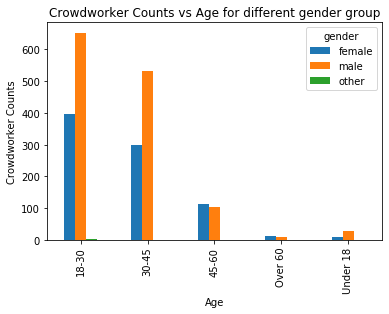

In [16]:
plt.figure(figsize=(8,8))
multibar_plot(attack_demograohics, 'age_group')
plt.ylabel('Crowdworker Counts')
plt.xlabel('Age')
plt.title('Crowdworker Counts vs Age for different gender group')
plt.savefig('plot/attack_age_gender')
plt.show()

-  **Education:**

gender,female,male,other
education,,,
bachelors,0.421114,0.577726,0.00116
doctorate,0.400000,0.600000,0.00000
hs,0.380349,0.619651,0.00000
masters,0.384416,0.615584,0.00000
none,0.000000,1.000000,0.00000
professional,0.259259,0.740741,0.00000
some,0.375000,0.625000,0.00000


<Figure size 576x576 with 0 Axes>

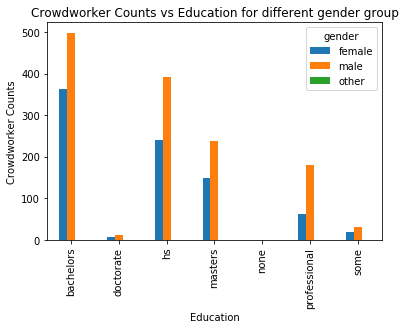

In [17]:
plt.figure(figsize=(8,8))
multibar_plot(attack_demograohics, 'education')
plt.ylabel('Crowdworker Counts')
plt.xlabel('Education')
plt.title('Crowdworker Counts vs Education for different gender group')
plt.savefig('plot/attack_education_gender')
plt.show()


-  **First Language:**

gender,female,male,other
english_first_language,,,
0,0.356264,0.643177,0.000559
1,0.504975,0.495025,0.000000


<Figure size 576x576 with 0 Axes>

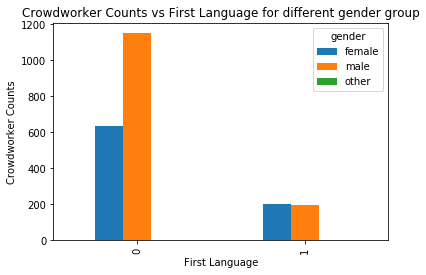

In [18]:
plt.figure(figsize=(8,8))
multibar_plot(attack_demograohics, 'english_first_language')
plt.ylabel('Crowdworker Counts')
plt.xlabel('First Language')
plt.title('Crowdworker Counts vs First Language for different gender group')
plt.savefig('plot/attack_language_gender')
plt.show()


### Toxicity
-  **Age:**

gender,female,male,other
age_group,,,
18-30,0.320623,0.679377,0.000000
30-45,0.366480,0.633520,0.000000
45-60,0.479730,0.520270,0.000000
Over 60,0.700000,0.300000,0.000000
Under 18,0.215190,0.772152,0.012658


<Figure size 576x576 with 0 Axes>

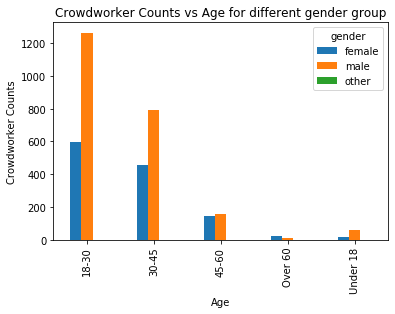

In [19]:
plt.figure(figsize=(8,8))
multibar_plot(toxic_demograohics, 'age_group')
plt.ylabel('Crowdworker Counts')
plt.xlabel('Age')
plt.title('Crowdworker Counts vs Age for different gender group')
plt.savefig('plot/toxic_age_gender')
plt.show()

-  **Education:**

gender,female,male,other
education,,,
bachelors,0.367800,0.632200,0.000000
doctorate,0.390244,0.609756,0.000000
hs,0.340156,0.658869,0.000975
masters,0.358974,0.641026,0.000000
none,0.000000,1.000000,0.000000
professional,0.308390,0.691610,0.000000
some,0.387097,0.612903,0.000000


<Figure size 576x576 with 0 Axes>

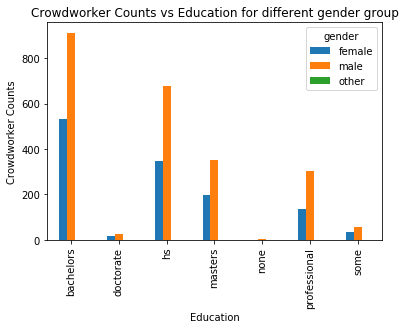

In [20]:
plt.figure(figsize=(8,8))
multibar_plot(toxic_demograohics, 'education')
plt.ylabel('Crowdworker Counts')
plt.xlabel('Education')
plt.title('Crowdworker Counts vs Education for different gender group')
plt.savefig('plot/toxic_education_gender')
plt.show()

-  **First Language:**

gender,female,male,other
english_first_language,,,
0,0.336410,0.663248,0.000342
1,0.418919,0.581081,0.000000


<Figure size 576x576 with 0 Axes>

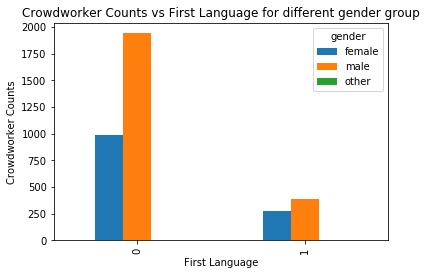

In [21]:
plt.figure(figsize=(8,8))
multibar_plot(toxic_demograohics, 'english_first_language')
plt.ylabel('Crowdworker Counts')
plt.xlabel('First Language')
plt.title('Crowdworker Counts vs First Language for different gender group')
plt.savefig('plot/toxic_language_gender')
plt.show()


We can see a larger gender gap in the majority of age, education, and language group of annotation workers.

For the age group, clearly, the gender difference is larger in the 18-30 and 30-45 groups. For the education level, the gender difference is larger for annotation workers with at least high school level education. Also, it is more gender-unbalanced for English native speakers than non-native speakers.

Now, let's check if there is a difference in labelling behaviors among different gender groups.

### Personal Attack

First, get the mean attack score for each worker.

In [22]:
mean_attack_score = attack.groupby("worker_id")["attack"].mean()
attack_demograohics["mean_attack_score"] = mean_attack_score

Get the mean attck score for each gender group. (Since we only have one person identifies as 'other', it may not be representative enough for that gender group. We just exclude it for the rest of the analysis)

In [23]:
attack_demograohics = attack_demograohics[attack_demograohics['gender']!='other']
attack_demograohics.groupby("gender").mean_attack_score.mean()

gender
female    0.184507
male      0.169148
Name: mean_attack_score, dtype: float64

From the data above, we can conclude that female has a slightly higher chance to label a comment as attack than male does (0.185 vs 0.169).

### Toxicity

First, get the mean toxicity score for each worker.

Notes: toxicity score ranging from very toxic (-2), to neutral (0), to very healthy (2)

In [24]:
mean_toxicity_score = toxic.groupby("worker_id")["toxicity_score"].mean()
toxic_demograohics["mean_toxicity_score"] = mean_toxicity_score

Get the mean toxicity score for each gender group. (Same as the personal attack data, since we only have one person identifies as 'other', it may not be representative enough for that gender group. We just exclude it for the rest of the analysis)

In [25]:
toxic_demograohics = toxic_demograohics[toxic_demograohics['gender']!='other']
toxic_demograohics.groupby("gender").mean_toxicity_score.mean()

gender
female    0.177039
male      0.229320
Name: mean_toxicity_score, dtype: float64

From the data above, we can conclude that female has a lower chance to label a comment as healthy than male does, which means more chance to label a comment as toxic than male does (0.177 vs 0.229).

Hence, based on the analysis we applied above, we can clear detect a gender unbalance in annotation workers of both Personal Attack and Toxicity datasets. Moreover, there is truely a difference labelling behaviors among workers in different gender groups.

## Step 3: Implications for research and product development

- Which, if any, of these demo applications would you expect the Perspective API or any model trained on the Wikipedia Talk corpus—to perform well in? Why?

WikiDetox is probably one demo application that I would expect the Perspective API to perform well in. It is a data visualization of toxic comments on Wikipedia. Since the Perspective API is trained based on comments from the Wikipedia Talk page and now it is used to show the result on the same trained data, but not used for predictions on some new datasets. Therefore, this application would work well using the Perspective API.WikiDetox is probably one demo application that I would expect the Perspective API to perform well in. It is a data visualization of toxic comments on Wikipedia. Since the Perspective API is trained based on comments from the Wikipedia Talk page and now it is used to show the result on the same trained data, but not used for predictions on some new datasets. Therefore, this application would work well using the Perspective API.

- Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?

Behave! is a demo application that I found to be interesting, but I personally have some concerns about this project using the Perspective API, as I do not believe it would perform well as expected. The Perspective API is trained on Wikipedia Talk page discussions and all of the comments are in English. However, users on Youtube, Reddit, and other comment forums may have different language styles than those on the Wikipedia Talk page and moreover, there may be a lot of languages used other than English, such as Spanish, Chinese, and so on. Clearly, the Perspective API might not detect the toxic comments in these languages, since only English comments are included in the training dataset. Therefore, it may be hard for this application to achieve high accuracy on comment detection on many websites.

- Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?

First of all, I would probably enrich the training data by using not only the Wikipedia Talk page, but also some other types of text sources, such as youtube comments, Twitter comments, and some other comment forums or social media. Also, if possible, I would try to include more languages. Second, I would probably make sure to increase the diversity of annotators to make sure more groups are represented, as the majority of annotators are male English speakers in this dataset. 